# Hotel Booking Cancellation - EDA
#### Predicting hotel bookings probable of cancellations
Goal of this notebook will be to analyze the data to get better understanding of it. 

### Import necessary libraries


In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import plotly.io as pio
pio.renderers.default = "notebook"


### Import data

In [181]:
df = pd.read_csv("/home/diwas/Yatra/Yatra/ML/data/booking_cleaned.csv")
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [182]:
df.drop(["booking_id"], axis = 1, inplace = True)

### Understanding the data

In [183]:
print("Dataset Shape:", df.shape)

Dataset Shape: (36285, 16)


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_adults          36285 non-null  int64  
 1   number_of_children        36285 non-null  int64  
 2   number_of_weekend_nights  36285 non-null  int64  
 3   number_of_week_nights     36285 non-null  int64  
 4   type_of_meal              36285 non-null  object 
 5   car_parking_space         36285 non-null  int64  
 6   room_type                 36285 non-null  object 
 7   lead_time                 36285 non-null  int64  
 8   market_segment_type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  p_c                       36285 non-null  int64  
 11  p_not_c                   36285 non-null  int64  
 12  average_price             36285 non-null  float64
 13  special_requests          36285 non-null  int64  
 14  date_o

Average price is slightly positively skewed.

Outiers are present

In [185]:
df.describe()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,p_c,p_not_c,average_price,special_requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [186]:
print(df.isnull().sum())

number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
p_c                         0
p_not_c                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64


In [187]:
print(df.select_dtypes(include=['object']).describe())

       type_of_meal    room_type market_segment_type date_of_reservation  \
count         36285        36285               36285               36285   
unique            4            7                   5                 553   
top     Meal Plan 1  Room_Type 1              Online          10/13/2018   
freq          27842        28138               23221                 254   

       booking_status  
count           36285  
unique              2  
top      Not_Canceled  
freq            24396  


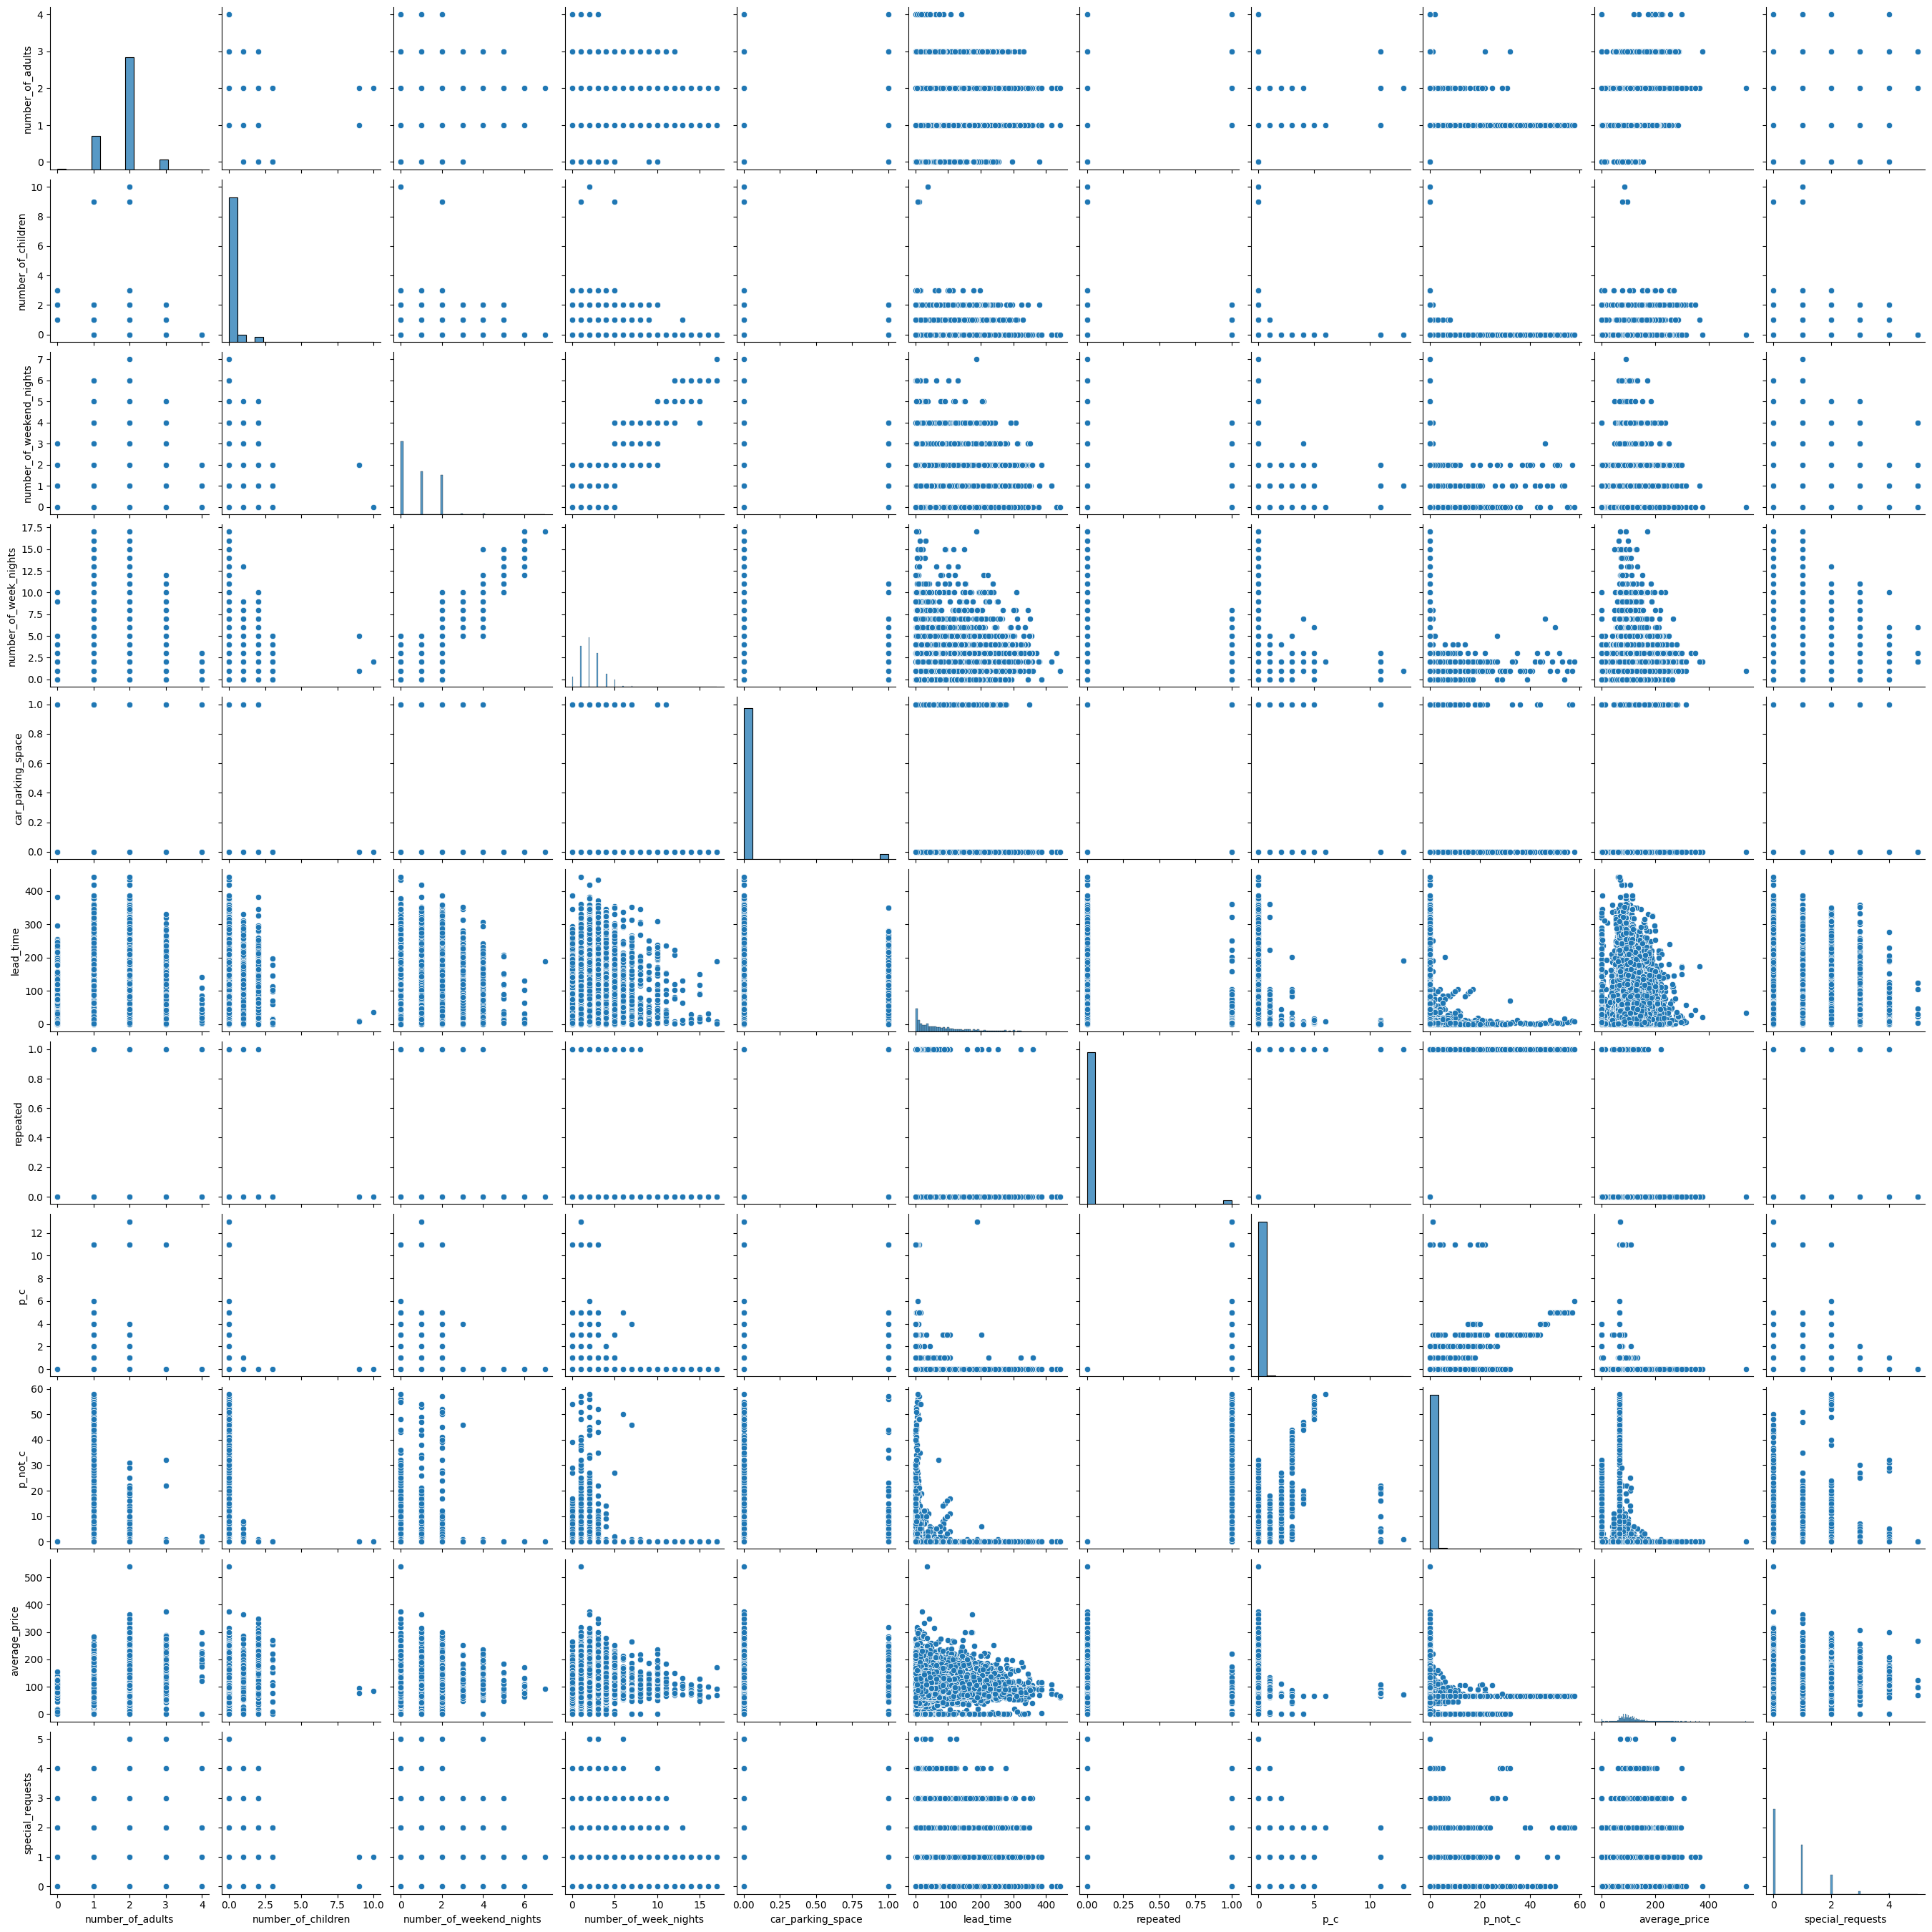

In [188]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create the pair plot
sns.pairplot(numeric_df)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Average Price')

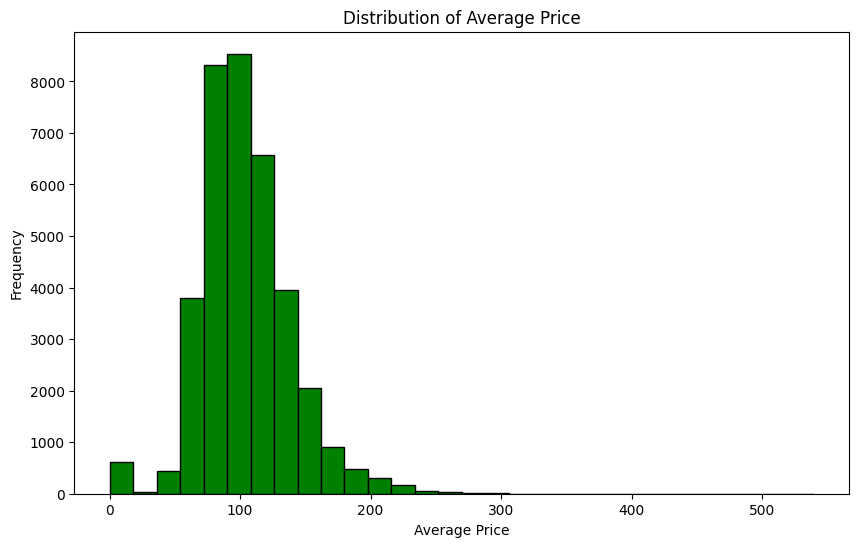

In [189]:
# Corrected histogram
plt.figure(figsize=(10, 6))
plt.hist(df["average_price"], bins=30, color="green", edgecolor="black")

# Labels and title
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.title("Distribution of Average Price")


In [190]:
print(df.select_dtypes(include=['object']).describe())

       type_of_meal    room_type market_segment_type date_of_reservation  \
count         36285        36285               36285               36285   
unique            4            7                   5                 553   
top     Meal Plan 1  Room_Type 1              Online          10/13/2018   
freq          27842        28138               23221                 254   

       booking_status  
count           36285  
unique              2  
top      Not_Canceled  
freq            24396  


In [191]:
df.duplicated().sum()

np.int64(10276)

#### Analyze target variable

In [192]:
print(df['booking_status'].value_counts())

booking_status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


Around half of the booking is cancelled in this hotel.


Cancellation Counts:
booking_status
Not_Canceled    0.672344
Canceled        0.327656
Name: proportion, dtype: float64


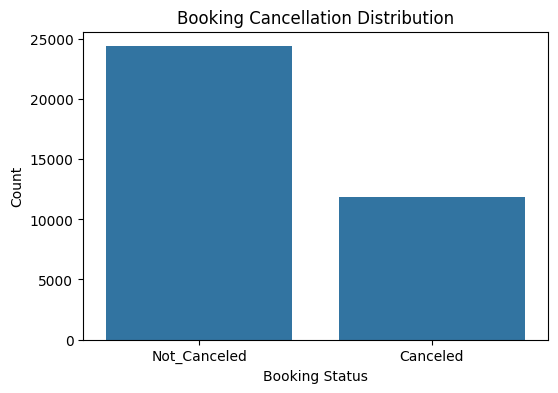

In [193]:
print("\nCancellation Counts:")
print(df['booking_status'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df)
plt.title('Booking Cancellation Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

### Analyzing lead time

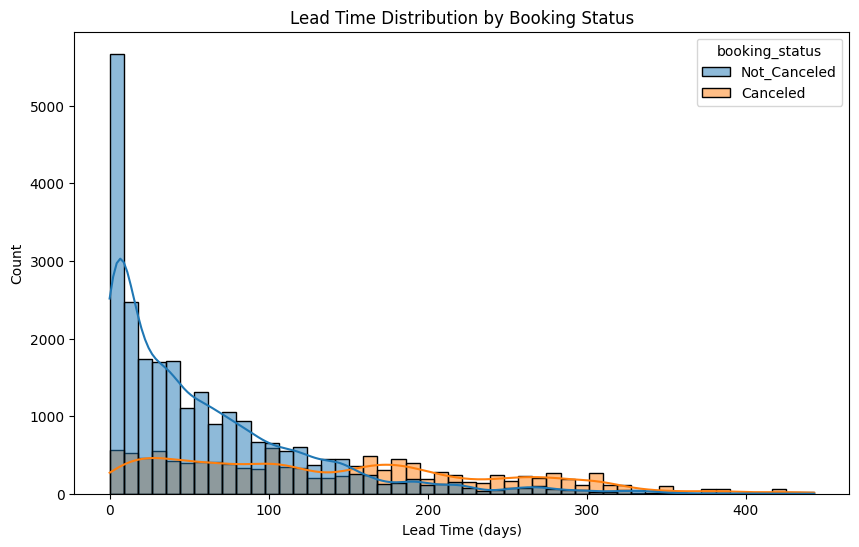

In [194]:
# 4. Lead Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='booking_status', bins=50, kde=True)
plt.title('Lead Time Distribution by Booking Status')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_13941/3270415433.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



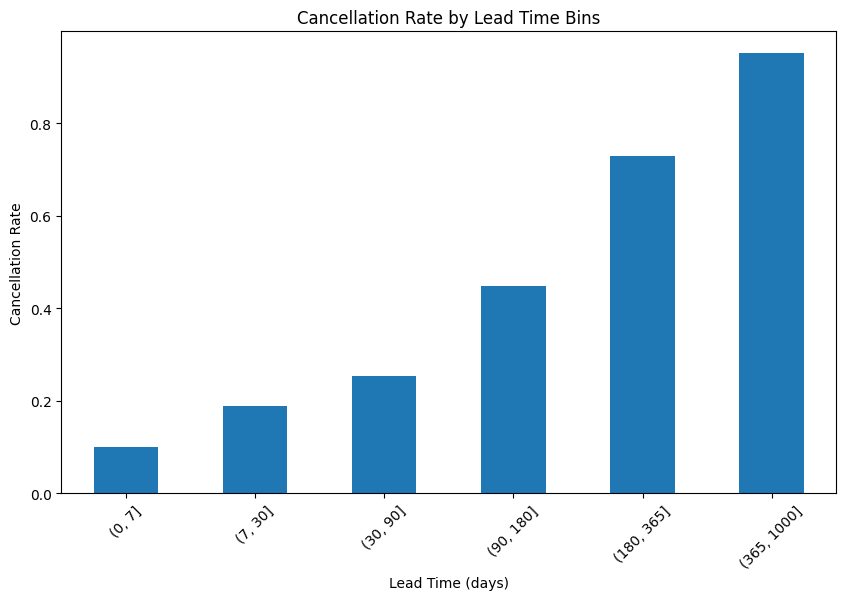

In [195]:
# 9. Cancellation Rate by Lead Time Bins
bins = pd.cut(df['lead_time'], bins=[0, 7, 30, 90, 180, 365, 1000])
cancellation_rate = df.groupby(bins)['booking_status'].apply(lambda x: (x == 'Canceled').mean())
plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar')
plt.title('Cancellation Rate by Lead Time Bins')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

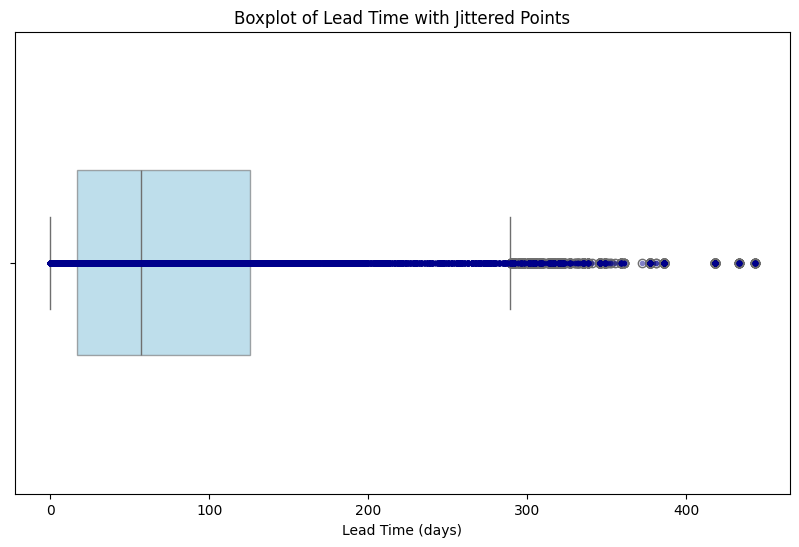

In [196]:
# Create the plot
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(
    x=df['lead_time'],
    color='skyblue',
    width=0.4,
    boxprops=dict(alpha=0.6)
)

# Jittered stripplot (overlay points)
sns.stripplot(
    x=df['lead_time'],
    color='darkblue',
    jitter=0,
    size=4,
    alpha=0.5
)

# Titles and labels
plt.title('Boxplot of Lead Time with Jittered Points')
plt.xlabel('Lead Time (days)')
plt.show()

Outliers are present in leadtime column

Looks like bookings are more probable when lead time increaes.

### What's the relation between average price 

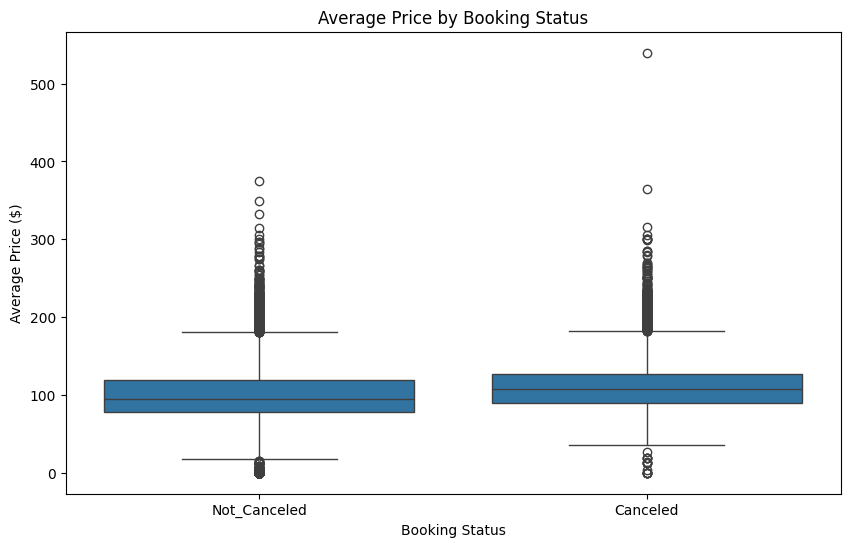

In [197]:
# 5. Average Price vs. Cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='average_price', data=df)
plt.title('Average Price by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price ($)')
plt.show()

Note: Our dataset has outliers so we have to fix it.

### Market segment analysis

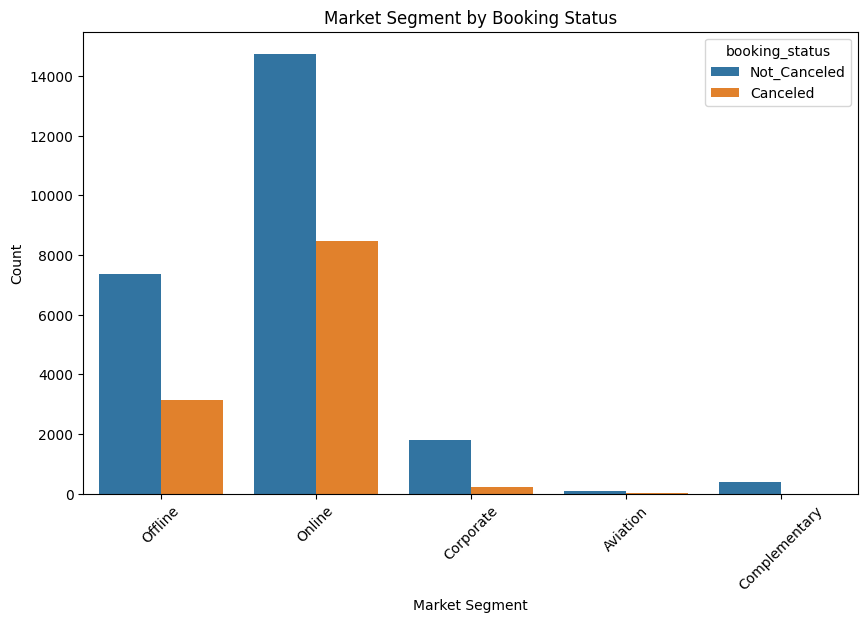

In [198]:
# 7. Market Segment Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Market Segment by Booking Status')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Looks like online segement has more cancellation than other segments.

### Analyzing realtion between total people and cancellation

In [199]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="total_people", hue="booking_status")

# Labels and title
plt.xlabel("Total Number of People")
plt.ylabel("Count of Bookings")
plt.title("Relation Between Total Number of People and Cancellations")
plt.legend(title="Booking Status")

# Show the plot
plt.show()

ValueError: Could not interpret value `total_people` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

Bookings with 2 people has maximum cancellation with 2 people have most bookings.

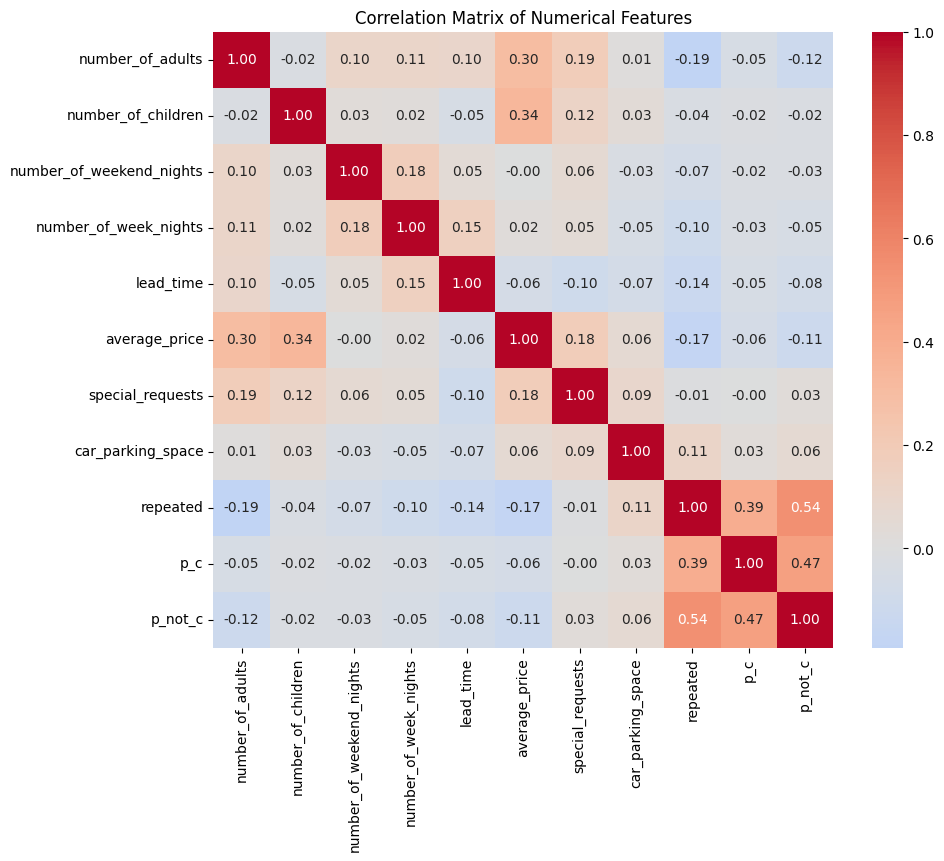

In [ ]:
# 8. Correlation Analysis (numerical features)
numerical_cols = ['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
                  'number_of_week_nights', 'lead_time', 'average_price', 'special_requests',
                  'car_parking_space', 'repeated', 'p_c', 'p_not_c']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Theres no as such multicorrelation

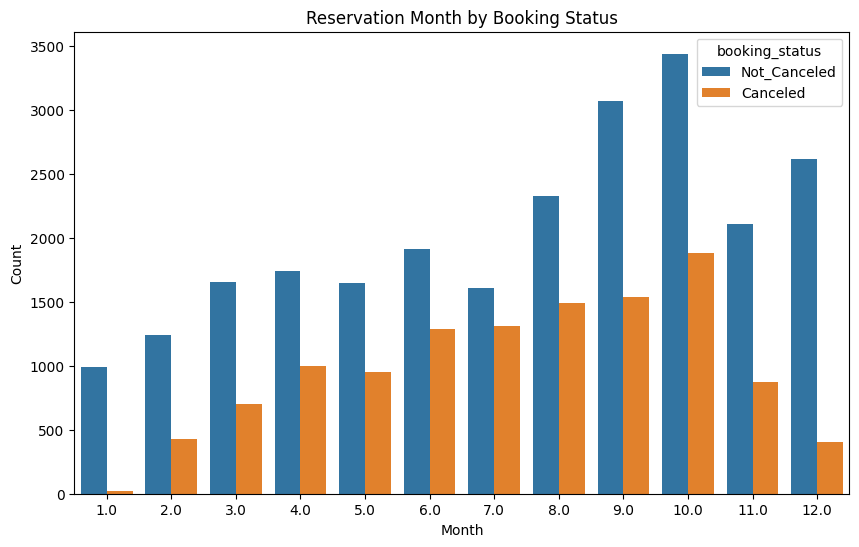

In [ ]:
# 10. Date of Reservation Analysis
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], errors='coerce')
df['reservation_month'] = df['date_of_reservation'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_month', hue='booking_status', data=df)
plt.title('Reservation Month by Booking Status')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Least cancellation happens in January 

### Room type analysis

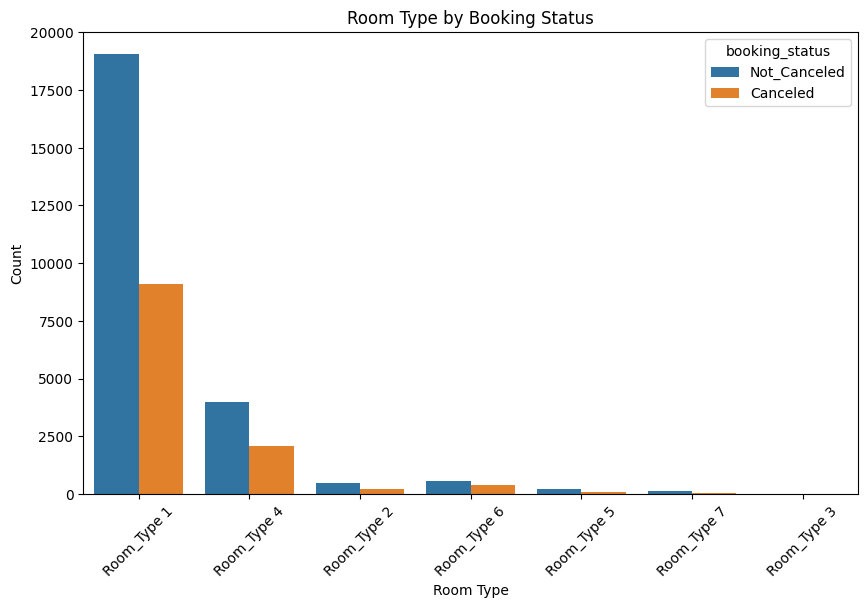

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', hue='booking_status', data=df)
plt.title('Room Type by Booking Status')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most of the people are opting for room type 1 

### Analyze meal type

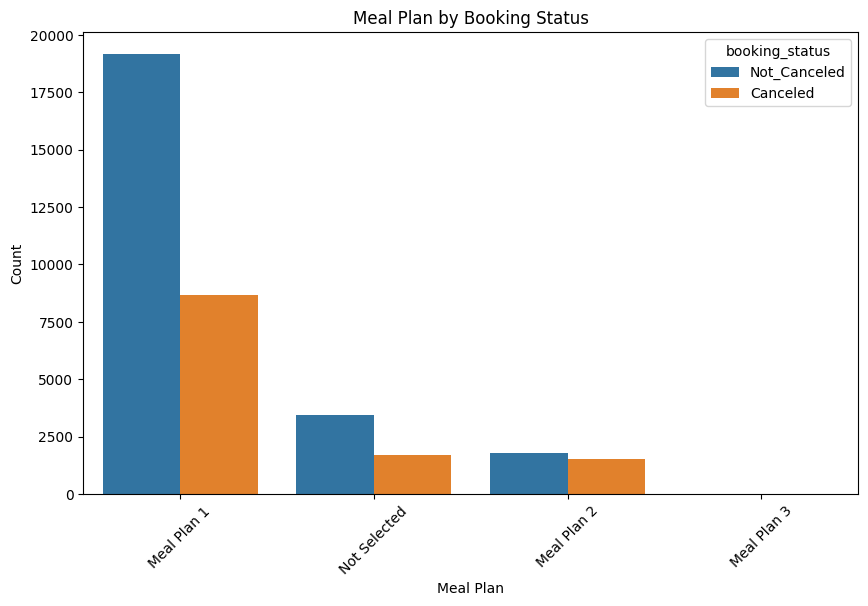

In [ ]:
# 12. Meal Plan vs. Cancellation
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_meal', hue='booking_status', data=df)
plt.title('Meal Plan by Booking Status')
plt.xlabel('Meal Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<b> Meal plan 2 has most cancellations. <b>

### Analyze date_time feature

#### Checking for invalid dates

In [ ]:
# Try conversion with errors='coerce'
converted_dates = pd.to_datetime(df['date_of_reservation'], errors='coerce')

# Count how many entries became NaT (invalid dates)
num_invalid_dates = converted_dates.isna().sum()

print(f"Number of invalid date entries: {num_invalid_dates}")

Number of invalid date entries: 37


### Normality test on numerical features

In [ ]:
from scipy.stats import normaltest

# Run normality test
numeric_df = df.select_dtypes(include=["float64", "int64"])
results = {}
for col in numeric_df.columns:
    stat, p = normaltest(numeric_df[col].dropna())
    results[col] = {"Statistic": stat, "p-value": p, "Normal?": "Yes" if p > 0.05 else "No"}

# Display results as a DataFrame
normality_results = pd.DataFrame(results).T.sort_values(by="p-value")
print(normality_results)

                             Statistic p-value Normal?
number_of_children        35260.688813     0.0      No
number_of_weekend_nights   2758.809798     0.0      No
number_of_week_nights     13618.187793     0.0      No
car_parking_space         37015.903462     0.0      No
lead_time                  7079.936628     0.0      No
repeated                  39969.150909     0.0      No
p_c                       87285.952157     0.0      No
p_not_c                   77751.280546     0.0      No
average_price              4927.968752     0.0      No
special_requests           5824.253897     0.0      No
total_people               7100.480623     0.0      No
total_days_stayed         19111.793476     0.0      No
reservation_month          6471.368182     0.0      No
number_of_adults           1157.658681     0.0      No


### Outlier detection using iqr

In [202]:
# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_dict[col] = {
            'count': len(outliers),
            'outlier_indices': outliers.index.tolist()
        }
    return outlier_dict

# Step 3: Run the function
outlier_info = detect_outliers_iqr(df, numeric_cols)

# Step 4: Display summary
for col, info in outlier_info.items():
    print(f"{col}: {info['count']} outliers")

number_of_adults: 10175 outliers
number_of_children: 2702 outliers
number_of_weekend_nights: 21 outliers
number_of_week_nights: 324 outliers
car_parking_space: 1124 outliers
lead_time: 1332 outliers
repeated: 930 outliers
p_c: 338 outliers
p_not_c: 812 outliers
average_price: 1696 outliers
special_requests: 762 outliers


### Analyze number of children and adults column

In [ ]:
# Checking for bookings with no adults or children
df = df[(df['number_of_adults'] == 0) & (df['number_of_children'] == 0)]
len(df)

0

### Miscellaneous

In [ ]:
# Check if there are any rows with average_price equal to 0
len(df[df['average_price'] == 0])

0

In [ ]:
median_price = df[df['average_price'] > 0]['average_price'].median()
median_price

nan

In [ ]:
median_price = df["average_price"].median()
median_price

np.float64(99.45)

In [ ]:
 df.loc[df['average_price'] <= 0, 'average_price']

63       0.0
145      0.0
209      0.0
266      0.0
267      0.0
        ... 
35983    0.0
36080    0.0
36114    0.0
36217    0.0
36250    0.0
Name: average_price, Length: 545, dtype: float64